In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [4]:
d=pd.read_csv('automobile.csv')
pd.set_option('display.Max_rows',None)
pd.set_option('display.Max_columns',None)

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
symboling              201 non-null int64
normalized_losses      201 non-null int64
make                   201 non-null object
fuel_type              201 non-null object
aspiration             201 non-null object
number_of_doors        201 non-null object
body_style             201 non-null object
drive_wheels           201 non-null object
engine_location        201 non-null object
wheel_base             201 non-null float64
length                 201 non-null float64
width                  201 non-null float64
height                 201 non-null float64
curb_weight            201 non-null int64
engine_type            201 non-null object
number_of_cylinders    201 non-null object
engine_size            201 non-null int64
fuel_system            201 non-null object
bore                   201 non-null float64
stroke                 201 non-null float64
compression_ratio      201 non-nu

In [5]:
d.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [21]:
d1=pd.get_dummies(data=d,columns=['fuel_type','aspiration','number_of_doors','body_style','drive_wheels','engine_location','engine_type','number_of_cylinders','fuel_system'])

In [49]:
d.nunique()
d1.shape

(201, 54)

In [23]:
X=d1.drop(['make','price'],axis=1)
y=d1['price']

In [25]:
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     60.26
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           8.80e-78
Time:                        16:02:29   Log-Likelihood:                -1807.8
No. Observations:                 201   AIC:                             3700.
Df Residuals:                     159   BIC:                             3838.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -8317.3129   3734.974     -2.227      0.027   -1.57e+04    -940.754
symboling                   -105.6334    262.477     -0.402      0.688    -624.024     412.757
normalized_losses             11.7615      8.351      1.408      0.161      -4.732      28.255
wheel_base                    55.9721     96.847      0.578      0.564    -135.301     247.246
length                       -64.4265     50.073     -1.287      0.200    -163.320      34.467
width                        656.7547    240.691      2.729      0.007     181.391    1132.118
height                       132.3088    136.981      0.966      0.336    -138.229     402.846
curb_weight                    4.2089      1.732      2.430      0.016       0.789       7.629
engine_size                  111.8185     25.974      4.305      0.000      60.519     163.118
bore                       -1859.9198   1594.547     -1.166      0.245   -5009.144    1289.304
stroke                     -4411.3187    902.235     -4.889      0.000   -6193.229   -2629.408
compression_ratio           -765.2902    528.772     -1.447      0.150   -1809.614     279.033
horsepower                    16.4870     22.534      0.732      0.465     -28.018      60.992
peak_rpm                       1.9154      0.619      3.094      0.002       0.693       3.138
city_mpg                    -166.0146    150.117     -1.106      0.270    -462.496     130.466
highway_mpg                  206.3407    136.196      1.515      0.132     -62.646     475.327
fuel_type_diesel             983.2217   2980.134      0.330      0.742   -4902.532    6868.975
fuel_type_gas              -9300.5346   2825.660     -3.291      0.001   -1.49e+04   -3719.867
aspiration_std             -4945.3174   1964.528     -2.517      0.013   -8825.253   -1065.382
aspiration_turbo           -3371.9955   1871.459     -1.802      0.073   -7068.120     324.129
number_of_doors_four       -4211.5939   1898.835     -2.218      0.028   -7961.786    -461.402
number_of_doors_two        -4105.7190   1884.625     -2.179      0.031   -7827.847    -383.591
body_style_convertible       937.7521   1066.483      0.879      0.381   -1168.548    3044.052
body_style_hardtop         -2362.7820   1109.774     -2.129      0.035   -4554.582    -170.982
body_style_hatchback       -2506.8683    921.594     -2.720      0.007   -4327.012    -686.724
body_style_sedan           -1593.8084    960.208     -1.660      0.099   -3490.215     302.598
body_style_wagon           -2791.6063   1103.360     -2.530      0.012   -4970.739    -612.474
drive_wheels_4wd           -2867.6114   1386.221     -2.069      0.040   -5605.393    -129.830
drive_wheels_fwd           -3048.1767   1402.479     -2.173      0.031   -5818.068    -278.285
drive_wheels_rwd           -2401.5248   138

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

61 61


In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
rr = Ridge(alpha=0.01) 
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

In [31]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [32]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [33]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.9562023821562744
linear regression test score: 0.8057447121782366
ridge regression train score low alpha: 0.9561933796554795
ridge regression test score low alpha: 0.8089175502497433
ridge regression train score high alpha: 0.870227114416309
ridge regression test score high alpha: 0.8081759127024672


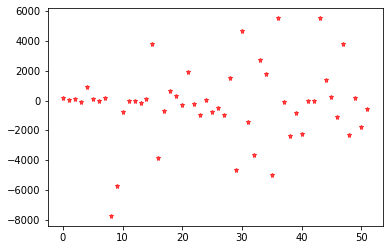

In [34]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers

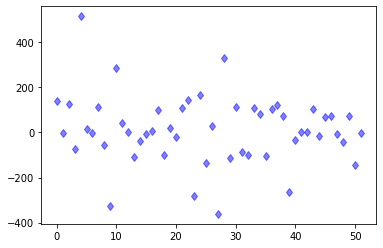

In [35]:
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency

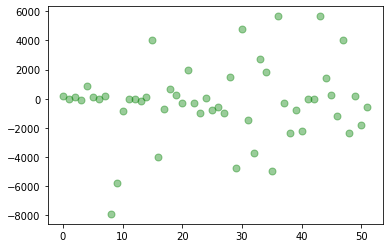

In [36]:
plt.plot(lr.coef_lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)2,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165348357.3864877, tolerance: 783415.423697143
  positive)


In [40]:
print("training score:", train_score )
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.9560953271527912
test score:  0.8067347000848705
number of features used:  46


In [41]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [42]:
print("LR training score:", lr_train_score )
print("LR test score: ", lr_test_score)

LR training score: 0.9562023821562744
LR test score:  0.8057447121782366


In [43]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [44]:
cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [45]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 1.03125618
Optimal l1_ratio: 1.000
Number of iterations 266


In [46]:
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(X_train, y_train)

ElasticNet(alpha=1.0312561797850999, copy_X=True, fit_intercept=True,
           l1_ratio=1.0, max_iter=266, normalize=True, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [47]:
print(r2_score(y_train, model.predict(X_train)))

0.9541315255611232


In [48]:
print(r2_score(y_test, model.predict(X_test)))

0.8204660636914128
